In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.simplify.simplify import simplify
from sympy import init_printing
from sympy import pprint

In [2]:
t, m1, m2, m3, g, l = smp.symbols('t, m1, m2, m3, g, l')
the1, the2, the3 = smp.symbols(r'\theta_1, \theta_2, \theta_3', cls=smp.Function)

the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(smp.diff(the1, t), t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

the3 = the3(t)
the3_d = smp.diff(the3, t)
the3_dd = smp.diff(smp.diff(the3, t), t)

x1, y1, x2, y2, x3, y3 = smp.symbols('x_1, y_1, x_2, y_2, x_3, y_3', cls = smp.Function)

x1 = x1(the1)
y1 = y1(the1)

x2 = x2(the1, the2)
y2 = y2(the1, the2)

x3 = x3(the1, the2, the3)
y3 = y3(the1, the2, the3)


x1 = (l)*smp.cos(the1)
y1 = -(l)*smp.sin(the1)
x2 = (l)*smp.cos(the1) + (l)*smp.cos(the2)
y2 = -(l)*smp.sin(the1) - (l)*smp.sin(the2)
x3 = (l)*smp.cos(the1) + (l)*smp.cos(the2) + (l)*smp.cos(the3)
y3 = -(l)*smp.sin(the1) - (l)*smp.sin(the2) - (l)*smp.sin(the3)

x1_d = smp.diff(x1, t)**2
y1_d = smp.diff(y1, t)**2
x2_d = smp.diff(x2, t)**2
y2_d = smp.diff(y2, t)**2
x3_d = smp.diff(x3, t)**2
y3_d = smp.diff(y3, t)**2

In [18]:
y3_d

(-l*cos(\theta_1(t))*Derivative(\theta_1(t), t) - l*cos(\theta_2(t))*Derivative(\theta_2(t), t) - l*cos(\theta_3(t))*Derivative(\theta_3(t), t))**2

In [3]:
T = 1/2 * m1 * (x1_d + y1_d) + 1/2 * m2 * (x2_d + y2_d) + 1/2 * m3 * (x3_d + y3_d)

V = m1*g*y1 + m2*g*y2 + m3*g*y2

L = T-V

In [20]:
L

g*l*m1*sin(\theta_1(t)) - g*m2*(-l*sin(\theta_1(t)) - l*sin(\theta_2(t))) - g*m3*(-l*sin(\theta_1(t)) - l*sin(\theta_2(t))) + 0.5*m1*(l**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + l**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((-l*sin(\theta_1(t))*Derivative(\theta_1(t), t) - l*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (-l*cos(\theta_1(t))*Derivative(\theta_1(t), t) - l*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2) + 0.5*m3*((-l*sin(\theta_1(t))*Derivative(\theta_1(t), t) - l*sin(\theta_2(t))*Derivative(\theta_2(t), t) - l*sin(\theta_3(t))*Derivative(\theta_3(t), t))**2 + (-l*cos(\theta_1(t))*Derivative(\theta_1(t), t) - l*cos(\theta_2(t))*Derivative(\theta_2(t), t) - l*cos(\theta_3(t))*Derivative(\theta_3(t), t))**2)

In [4]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, the3) - smp.diff(smp.diff(L, the3_d), t)
LE3 = LE3.simplify()

In [22]:
LE3

1.0*l**2*m3*(sin(\theta_1(t) - \theta_3(t))*Derivative(\theta_1(t), t)**2 + sin(\theta_2(t) - \theta_3(t))*Derivative(\theta_2(t), t)**2 - cos(\theta_1(t) - \theta_3(t))*Derivative(\theta_1(t), (t, 2)) - cos(\theta_2(t) - \theta_3(t))*Derivative(\theta_2(t), (t, 2)) - Derivative(\theta_3(t), (t, 2)))

In [5]:
sols = smp.solve([LE1, LE2, LE3], (the1_dd, the2_dd, the3_dd), simplify=False, rational=False)

In [26]:
sols[the1_dd]

3**2*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))/(l*m1*m2 - l*m1*m3*cos(\theta_2(t) - \theta_3(t))**2 + l*m1*m3 - l*m2**2*cos(\theta_1(t) - \theta_2(t))**2 + l*m2**2 - 2*l*m2*m3*cos(\theta_1(t) - \theta_2(t))**2 + 2*l*m2*m3*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_3(t))*cos(\theta_2(t) - \theta_3(t)) - l*m2*m3*cos(\theta_1(t) - \theta_3(t))**2 - l*m2*m3*cos(\theta_2(t) - \theta_3(t))**2 + 2*l*m2*m3 - l*m3**2*cos(\theta_1(t) - \theta_2(t))**2 + 2*l*m3**2*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_3(t))*cos(\theta_2(t) - \theta_3(t)) - l*m3**2*cos(\theta_1(t) - \theta_3(t))**2 - l*m3**2*cos(\theta_2(t) - \theta_3(t))**2 + l*m3**2) + g*m3**2*cos(\theta_1(t) - \theta_3(t))*cos(\theta_2(t) - \theta_3(t))*cos(\theta_2(t))/(l*m1*m2 - l*m1*m3*cos(\theta_2(t) - \theta_3(t))**2 + l*m1*m3 - l*m2**2*cos(\theta_1(t) - \theta_2(t))**2 + l*m2**2 - 2*l*m2*m3*cos(\theta_1(t) - \theta_2(t))**2 + 2*l*m2*m3*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_3(t))*cos(\

In [6]:
dw1dt_f = smp.lambdify((m1, m2, m3, g, l, the1, the2, the3, the1_d, the2_d, the3_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dw2dt_f = smp.lambdify((m1, m2, m3, g, l, the1, the2, the3, the1_d, the2_d, the3_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw3dt_f = smp.lambdify((m1, m2, m3, g, l, the1, the2, the3, the1_d, the2_d, the3_d), sols[the3_dd])
dthe3dt_f = smp.lambdify(the3_d, the3_d)

In [28]:
dw1dt_f

<function _lambdifygenerated(m1, m2, m3, g, l, _Dummy_40, _Dummy_39, _Dummy_38, _Dummy_37, _Dummy_36, _Dummy_35)>

In [7]:
def dSdt(S, t):
    the1, w1, the2, w2, the3, w3 = S
    return[
        dthe1dt_f(w1),
        dw1dt_f(m1, m2, m3, g, l, the1,the2,the3,w1,w2,w3),

        dthe2dt_f(w2),
        dw2dt_f(m1, m2, m3, g, l, the1,the2,the3,w1,w2,w3),

        dthe3dt_f(w3),
        dw3dt_f(m1, m2, m3, g, l, the1,the2,the3,w1,w2,w3),
       
    ]

In [8]:
t = np.linspace(0, 20, 1000)
g = 9.81
m1 = 1
m2 = 2
m3 = 3
l = 1
y0=[np.pi/2,0,(3/2)*np.pi/2,0,np.pi/2,0]

ans = odeint(dSdt, y0, t)

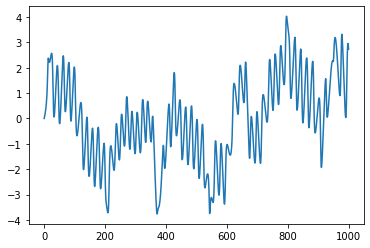

In [25]:

plt.plot(ans.T[5])

In [28]:
def get_x1y1x2y2x3y3(the1, the2, the3):
    return(
        (l)*np.cos(the1),
        -(l)*np.sin(the1),
        (l)*np.cos(the1) + (l)*np.cos(the2),
        -(l)*np.sin(the1) - (l)*np.sin(the2),
        (l)*np.cos(the1) + (l)*np.cos(the2) + (l)*np.cos(the3),
        -(l)*np.sin(the1) - (l)*np.sin(the2) - (l)*np.sin(the3),
    )

In [29]:
x1, y1, x2, y2, x3, y3 = get_x1y1x2y2x3y3(ans.T[0],  ans.T[2],  ans.T[4])

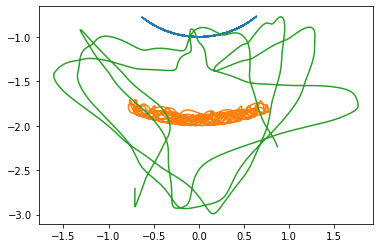

In [34]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i], x3[i]], [0, y1[i], y2[i], y3[i]])

fig, ax = plt.subplots(1,1, figsize=(8,8))+¡¡
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-20,10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
ani.save('pen3.gif', writer ='pillow', fps=50)